In [ ]:
# https://data.world/ochaphilippines/cea41a64-36c7-4677-8c87-a63b268a70ac

In [ ]:
%%capture
!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
schools = pd.read_csv('/content/drive/MyDrive/schools.csv')
schools

,"OBJECTID,N,9,0","Region,C,254","Division,C,254","ID,N,19,11","School,C,254","Municipali,C,254","Legislativ,C,254","Total_Enro,N,19,11","Total_Inst,N,19,11","Color_Code,C,254","Barangay,C,254","Province,C,254","District,C,254","Type_of_Sc,C,254","GPS_Source,C,50"
0,1,NCR,Quezon City,319506.0,National Orthopedic Hospital School for Crippl...,QUEZON CITY,1st,85.0,8.0,Blue,NaN,NCR SECOND DISTRICT,School District I,School with no Annexes,GPS Pinning (2012)
1,2,NCR,Pasay City,319602.0,Philippine National School for the Blind,PASAY CITY,Lone,27.0,9.0,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012)
2,3,NCR,Pasay City,319603.0,Philippine School for the Deaf,PASAY CITY,Lone,251.0,84.0,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012)
3,4,NCR,Pasay City,223002.0,Philippine School for the Deaf,PASAY CITY,Lone,260.0,84.0,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012)
4,5,NCR,Pasay City,223001.0,Philippine National School for the Blind,PASAY CITY,Lone,46.0,9.0,Blue,NaN,NCR FOURTH DISTRICT,Pasay City West District,School with no Annexes,GPS Pinning (2012)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16017,16018,Region III,Zambales,107013.0,Mapanao ES,SUBIC,1st,265.0,3.0,Red,Asinan Proper,ZAMBALES,Subic,School with no Annexes,GPS Pinning (2009-10)
16018,16019,Region III,Zambales,107007.0,Calapandayan ES,SUBIC,1st,1187.0,26.0,Blue,Calapandayan,ZAMBALES,Subic,School with no Annexes,GPS Pinning (2009-10)
16019,16020,Region III,Zambales,107018.0,San Isidro ES,SUBIC,1st,793.0,16.0,Yellow,San Isidro,ZAMBALES,Subic,School with no Annexes,GPS Pinning (2009-10)
16020,16021,Region III,Zambales,107017.0,Pamatawan ES,SUBIC,1st,417.0,14.0,Blue,Pamatawan,ZAMBALES,Subic,School with no Annexes,GPS Pinning (2009-10)


In [ ]:
enrol_mncplt = schools.groupby('Municipali,C,254').sum()
enrol_mncplt = enrol_mncplt['Total_Enro,N,19,11']

schol_mncplt = schools.groupby('Municipali,C,254').count()
schol_mncplt = schol_mncplt['OBJECTID,N,9,0']

municipality = pd.merge(enrol_mncplt,schol_mncplt, left_on = 'Municipali,C,254', right_on = 'Municipali,C,254')
municipality['density'] = municipality['Total_Enro,N,19,11'] / municipality['OBJECTID,N,9,0']
municipality = municipality.reset_index()

top20_enrol = (municipality.sort_values('Total_Enro,N,19,11', ascending = False)).head(20)
top20_schls = (municipality.sort_values('OBJECTID,N,9,0', ascending = False)).head(20)
top20_dnsty = (municipality.sort_values('density', ascending = False)).head(20)

Text(0.5, 1.0, 'Top 20 Municipalities with the Highest School Densities')

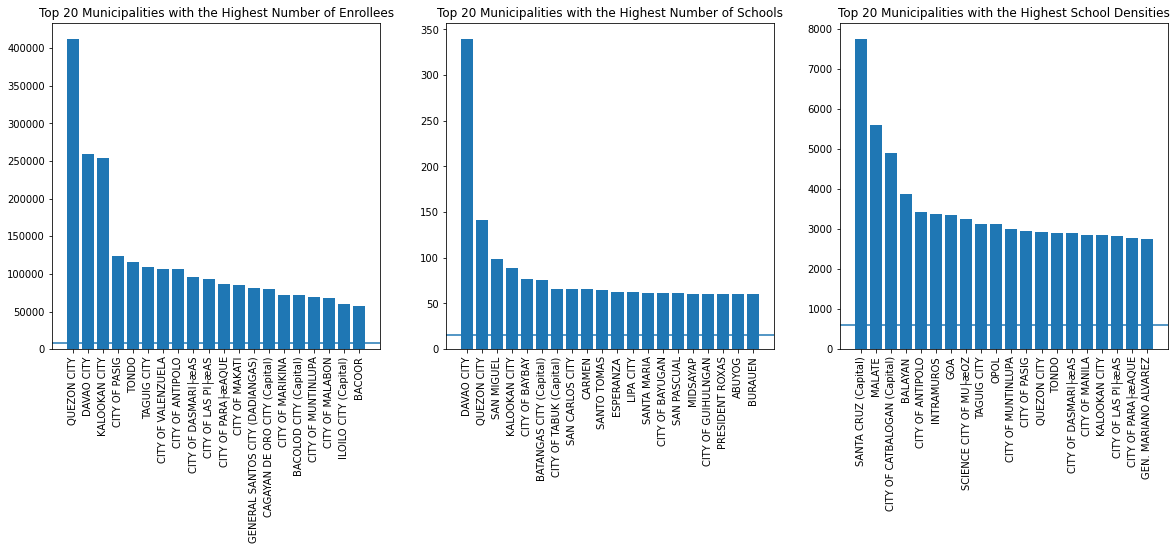

In [ ]:
plt.figure(figsize=(20,6))
ax = plt.subplot(1,3,1)
plt.bar(top20_enrol['Municipali,C,254'], top20_enrol['Total_Enro,N,19,11'])
plt.xticks(rotation=90)
plt.axhline(y=np.nanmean(municipality['Total_Enro,N,19,11']))
plt.title('Top 20 Municipalities with the Highest Number of Enrollees')

ax = plt.subplot(1,3,2)
plt.bar(top20_schls['Municipali,C,254'], top20_schls['OBJECTID,N,9,0'])
plt.xticks(rotation=90)
plt.axhline(y=np.nanmean(municipality['OBJECTID,N,9,0']))
plt.title('Top 20 Municipalities with the Highest Number of Schools')

ax = plt.subplot(1,3,3)
plt.bar(top20_dnsty['Municipali,C,254'], top20_dnsty['density'])
plt.xticks(rotation=90)
plt.axhline(y=np.nanmean(municipality['density']))
plt.title('Top 20 Municipalities with the Highest School Densities')

- Quezon City has the largest number of students compared to all other cities and municipalities.
- Though Davao city does not have the most students, they do have the most schools in the Philippines.
- Santa Cruz in the NCR has the densest schools in the Philippines.

In [ ]:
enrol_region = schools.groupby('Region,C,254').sum()
enrol_region = enrol_region['Total_Enro,N,19,11']

schol_region = schools.groupby('Region,C,254').count()
schol_region = schol_region['OBJECTID,N,9,0']

regional = pd.merge(enrol_region,schol_region, left_on = 'Region,C,254', right_on = 'Region,C,254')
regional['density'] = regional['Total_Enro,N,19,11'] / regional['OBJECTID,N,9,0']
regional = regional.reset_index()

In [ ]:
region_map = gpd.GeoDataFrame.from_file('/content/drive/MyDrive/ph-regions-2015-notebook-master/Original/Regions.shp')

In [ ]:
region_map = region_map.reindex([0,7,4,12,10,3,5,2,11,1,15,6,9,16,13,8,14])
region_map = region_map.reset_index(drop = True)
region_map = region_map.reset_index()
regional = pd.concat([region_map,regional], axis = 1)

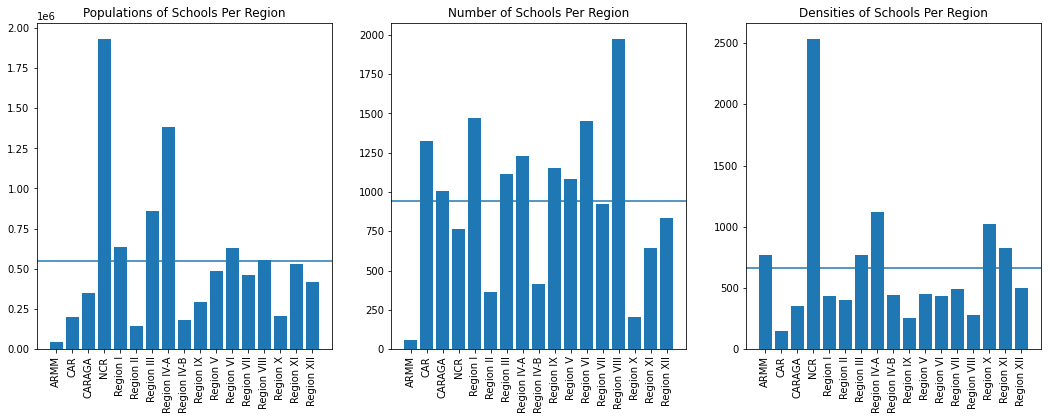

In [ ]:
plt.figure(figsize=(18,6))
ax = plt.subplot(1,3,1)
plt.bar(regional['Region,C,254'], regional['Total_Enro,N,19,11'])
plt.xticks(rotation=90)
plt.title('Populations of Schools Per Region')
plt.axhline(y=np.nanmean(regional['Total_Enro,N,19,11']))

ax = plt.subplot(1,3,2)
plt.bar(regional['Region,C,254'], regional['OBJECTID,N,9,0'])
plt.xticks(rotation=90)
plt.title('Number of Schools Per Region')
plt.axhline(y=np.nanmean(regional['OBJECTID,N,9,0']))

ax = plt.subplot(1,3,3)
plt.bar(regional['Region,C,254'], regional['density'])
plt.xticks(rotation=90)
plt.title('Densities of Schools Per Region')
plt.axhline(y=np.nanmean(regional['density']))

- NCR has the most enrolees compared to all other regions. Region IV-A and Region III comes in second and third respectively.
- ARMM has the least amount of schools and enrolees, however their schools are more dense than the national average.
- Region VIII has the largest number of schools, around twice the Average. Region I and Region VI comes in second with similar numbers.
- NCR's schools are the most dense, while region CAR are the least dense.

In [ ]:
def plot_annotate(name, xy, xytext, color='black'):
    ax.annotate(text=name, xy=xy, xytext=xytext, size=16, arrowprops=dict(arrowstyle="->", color=color), 
                horizontalalignment='center', color=color)

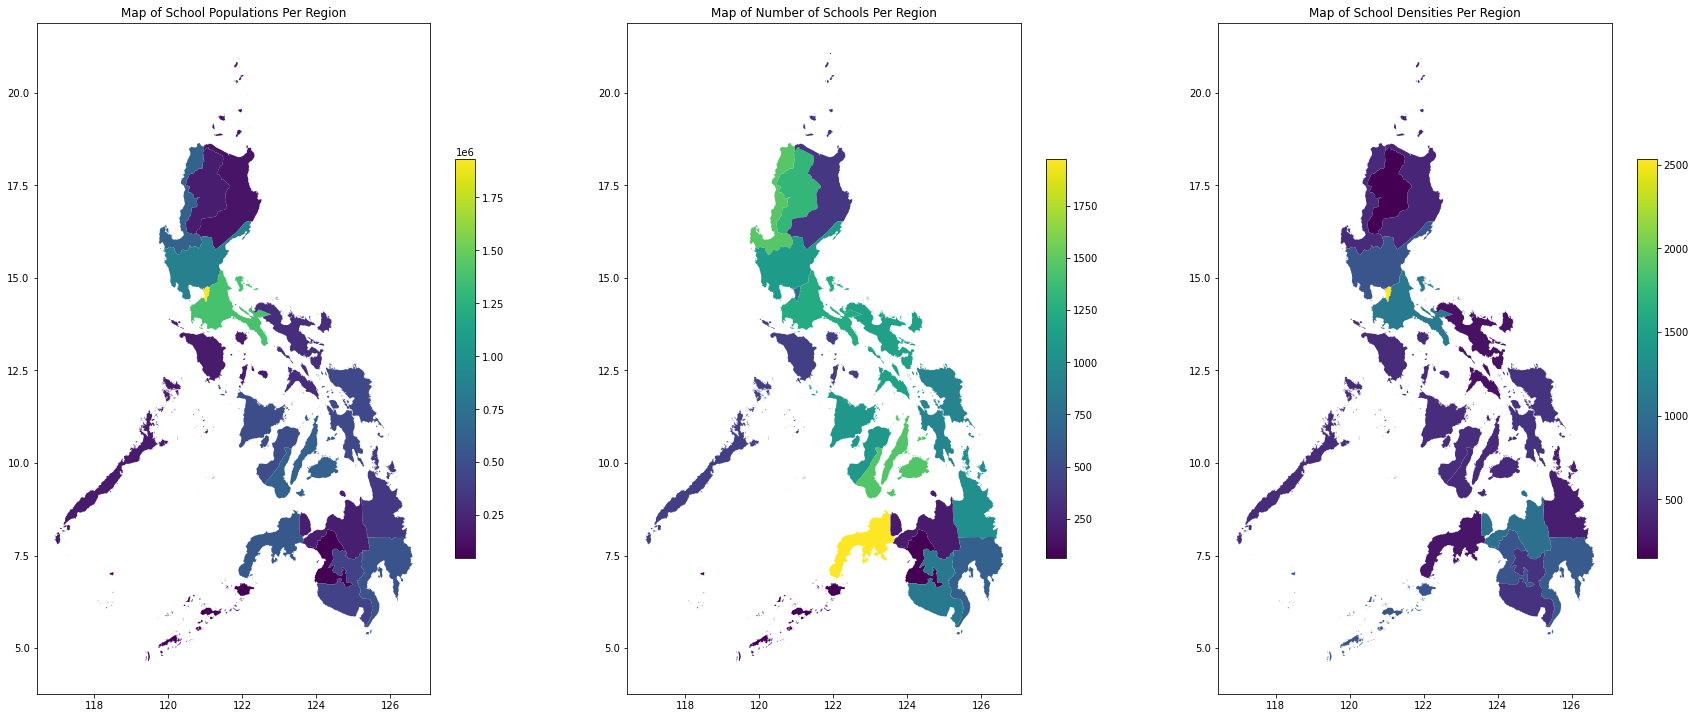

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
regional.plot(column = 'Total_Enro,N,19,11', ax = axes[0], legend = True, legend_kwds={'shrink': 0.245})
axes[0].set_title('Map of School Populations Per Region')

regional.plot(column = 'OBJECTID,N,9,0', ax = axes[1], legend = True, legend_kwds={'shrink': 0.245})
axes[1].set_title('Map of Number of Schools Per Region')

regional.plot(column = 'density', ax = axes[2], legend = True, legend_kwds={'shrink': 0.245})
axes[2].set_title('Map of School Densities Per Region')

fig.set_figheight(30)
fig.set_figwidth(30)

**Regional School Demographic of the Philippines**

The graphs show a geographic representation of the school populations, number of schools, and school densities of the Philippines. The data is exactly the same as the graphs above.

In [ ]:
regional['islnd'] = ['Mindanao', 'Luzon', 'Mindanao', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Luzon', 'Mindanao', 'Luzon', 'Visayas', 'Visayas', 'Visayas', 'Mindanao', 'Mindanao','Mindanao']
island = regional.groupby('islnd').sum().reset_index()
display(island)

,islnd,index,"Total_Enro,N,19,11","OBJECTID,N,9,0",density
0,Luzon,44,5822504.0,7767,6301.532917
1,Mindanao,56,1850330.0,3900,3730.307017
2,Visayas,36,1644788.0,4355,1210.016020


Text(0.5, 1.0, 'Density of Schools Per Island Group')

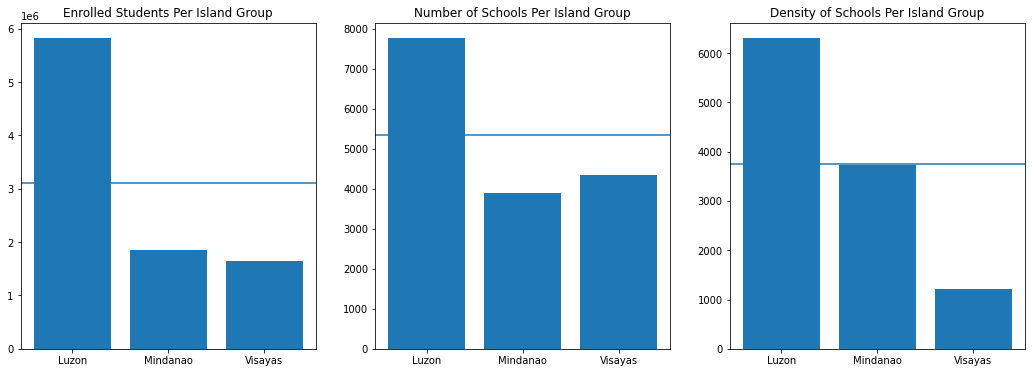

In [ ]:
plt.figure(figsize=(18,6))
ax = plt.subplot(1,3,1)
plt.bar(island['islnd'], island['Total_Enro,N,19,11'])
plt.axhline(y=np.nanmean(island['Total_Enro,N,19,11']))
plt.title('Enrolled Students Per Island Group')

ax = plt.subplot(1,3,2)
plt.bar(island['islnd'], island['OBJECTID,N,9,0'])
plt.axhline(y=np.nanmean(island['OBJECTID,N,9,0']))
plt.title('Number of Schools Per Island Group')

ax = plt.subplot(1,3,3)
plt.bar(island['islnd'], island['density'])
plt.axhline(y=np.nanmean(island['density']))
plt.title('Density of Schools Per Island Group')

**School Demographic by Island Group**
- Luzon has the largest amount of enrolled students, while Mindanao and Visayas have similar numbers.
- Luzon also has the largest number of schools,  with Visayas in second having more schools than Mindanao.
- However, while Mindanao has the least number of schools, the island comes in second in terms of school density that is siginificantly higher than Visayas.

Text(0.5, 1.0, 'Nationwide School Populations')

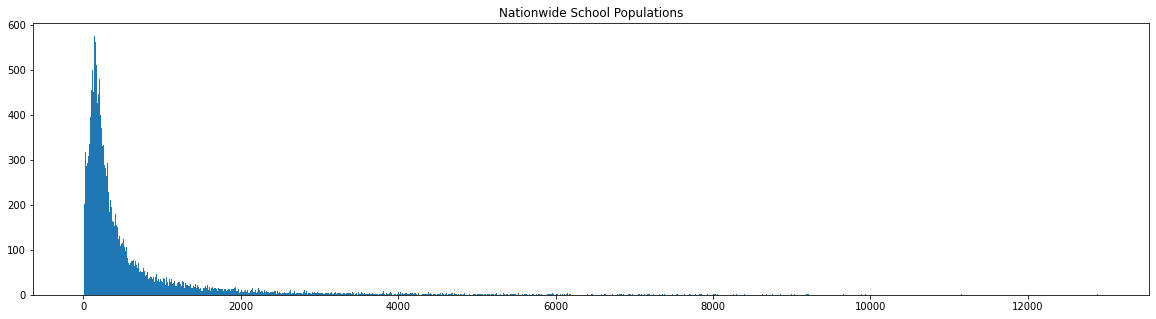

In [ ]:
plt.figure(figsize=(20,5)) 
plt.hist((schools['Total_Enro,N,19,11']), bins = 1000)
plt.title('Nationwide School Populations')

**Distribution of School Populations**

- The histogram shows the distribution of schools depending on their population.
- Majority of schools fall under populations under 2000. 

Text(0.5, 1.0, 'Nationwide School Populations')

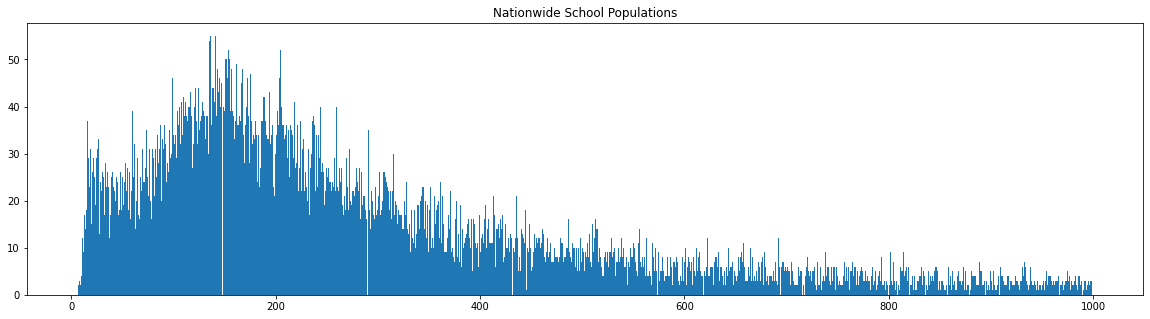

In [ ]:
x = schools[schools['Total_Enro,N,19,11'] <= 1000.0]

plt.figure(figsize=(20,5)) 
plt.hist(x['Total_Enro,N,19,11'], bins = 1000)
plt.title('Nationwide School Populations')

<BarContainer object of 5 artists>

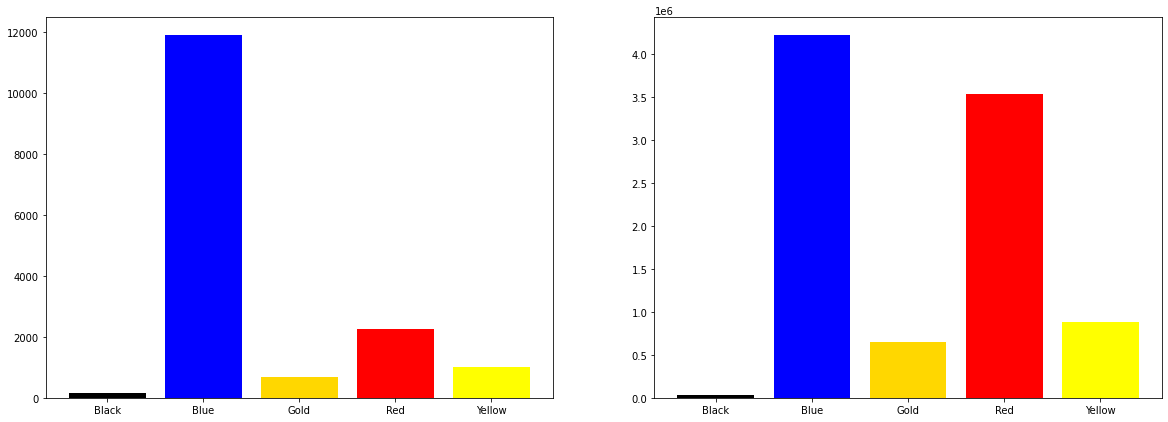

In [ ]:
plt.figure(figsize=(20,7))
ax = plt.subplot(1,2,1)

color_x = schools.groupby('Color_Code,C,254', as_index = False).count()
plt.bar(color_x['Color_Code,C,254'], color_x['OBJECTID,N,9,0'], color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
ax = plt.subplot(1,2,2)

color_y = schools.groupby('Color_Code,C,254', as_index = False).sum()
plt.bar(color_y['Color_Code,C,254'], color_y['Total_Enro,N,19,11'], color = ['Black', 'b', 'Gold', 'r', 'Yellow'])

**Color Codes of Philippine Schools**

Here's the meaning of each color according to DO 88, s. 2009 of the Department of Education.

- Black: No nationally funded teacher
- Red: 40 Teacher to Student Ratio, Hot Color zone, with teacher needs.
- Orange: 35-39 Teacher to Student Ratio, Hot Color zone, with teacher needs.
- Gold: 30-34 Teacher to Student Ratio, Hot Color zone, with teacher needs.
- Yellow: 25-30 Teacher to Student Ratio, Hot Color zone, with teacher needs.
- Green: 20-24 Teacher to Student Ratio, Cool Color zone, with excess teachers.
- Sky Blue: 15-20 Teacher to Student Ratio, Cool Color zone, with excess teachers.
- Blue: >15 Teacher to Student Ratio, Cool Color zone, with excess teachers.

The dataset only includes, Black, Red, Gold, Yellow, and Blue codes.

- The graph on the left shows the number of schools per category. The majority of schools are code Blue, in the cool color zone with excess teachers. However, there are still thousands of schools that are in the hot zone with teacher needs, and even schools without nationally funded teachers.
- The graph on the right shows the number of students enrolled on each category of school. This shows a better picture of the condition of schools because it indicates what conditions are students subjected to. 
- Even though there are a lot more blue schools than red schools, there is still a big number of students who are enroled in high student-to-teacher ratio schools. 

Text(0.5, 1.0, 'Code Blue')

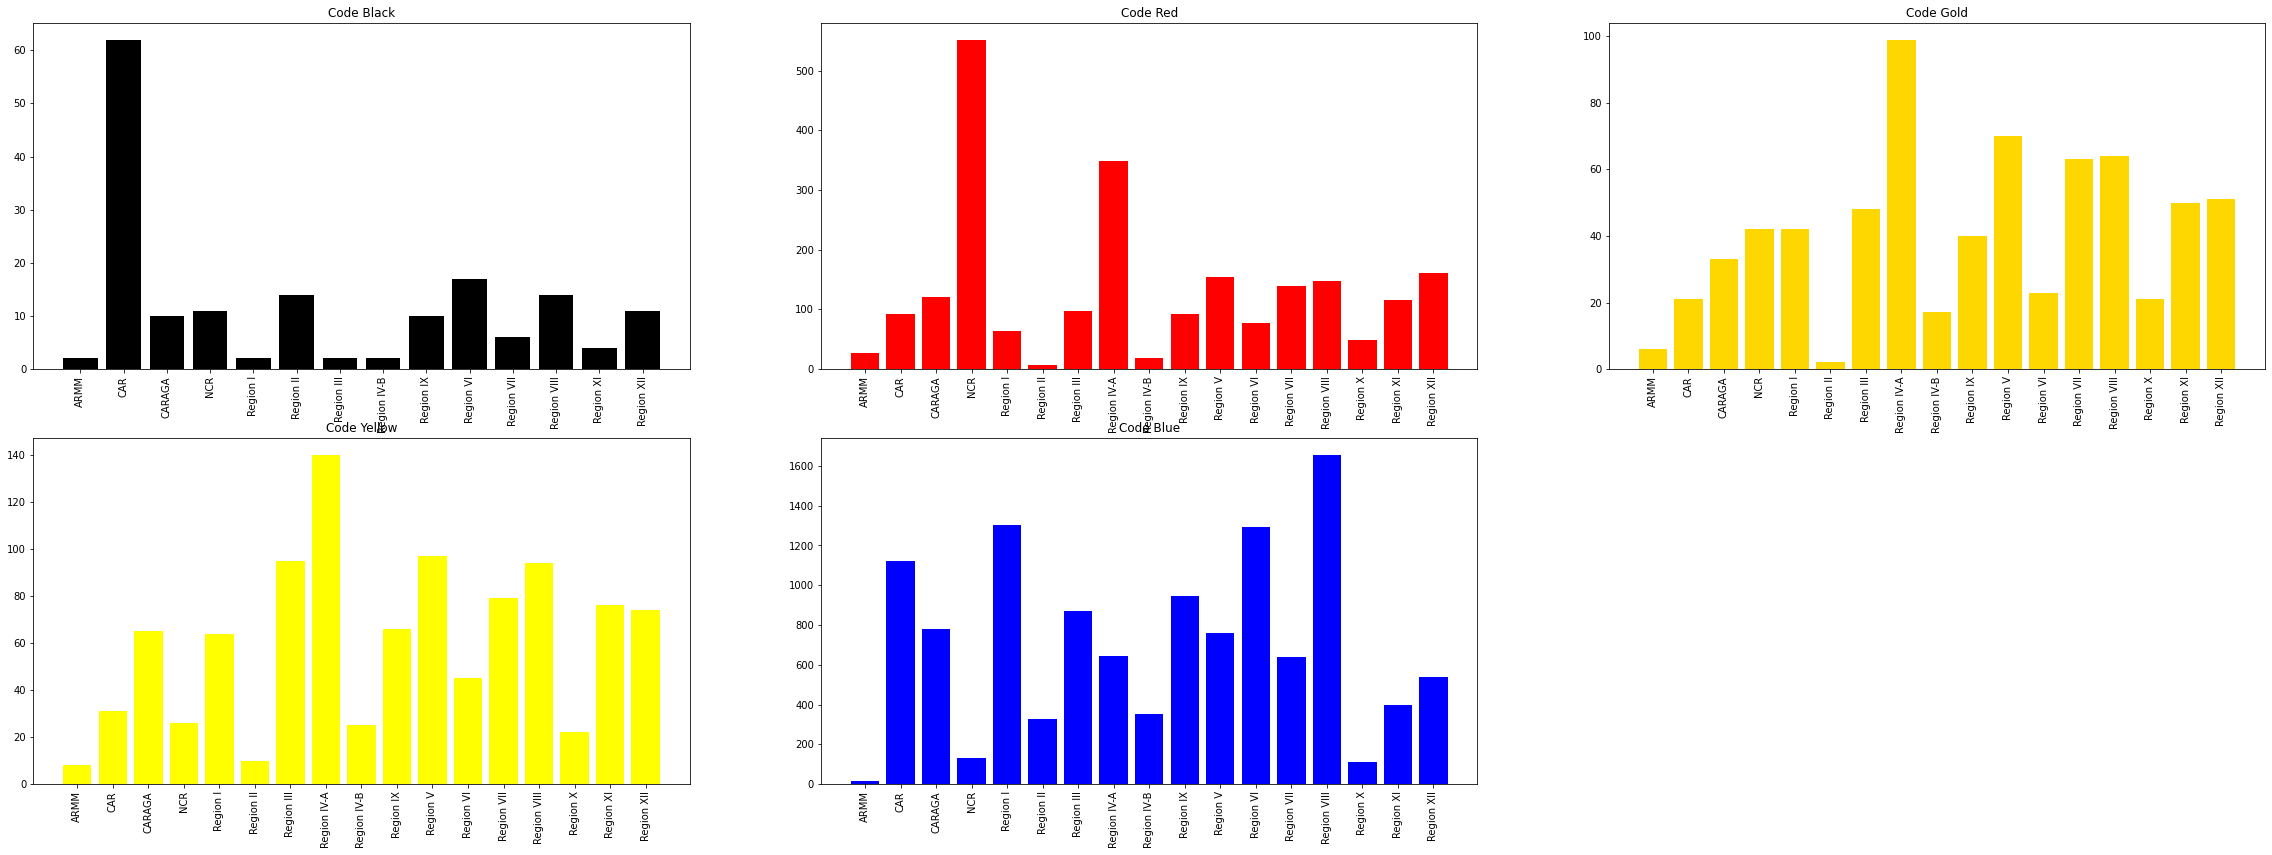

In [ ]:
schools.head()
color = schools.groupby(['Color_Code,C,254','Region,C,254'], as_index = False).count()

plt.figure(figsize=(40,14))
ax = plt.subplot(2,3,1)
plt.bar(color[color['Color_Code,C,254'] == 'Black']['Region,C,254'],
        color[color['Color_Code,C,254'] == 'Black']['OBJECTID,N,9,0'],
        color = 'Black')
plt.xticks(rotation=90)
plt.title('Code Black')

ax = plt.subplot(2,3,2)
plt.bar(color[color['Color_Code,C,254'] == 'Red']['Region,C,254'],
        color[color['Color_Code,C,254'] == 'Red']['OBJECTID,N,9,0'],
        color = 'r')
plt.xticks(rotation=90)
plt.title('Code Red')

ax = plt.subplot(2,3,3)
plt.bar(color[color['Color_Code,C,254'] == 'Gold']['Region,C,254'],
        color[color['Color_Code,C,254'] == 'Gold']['OBJECTID,N,9,0'],
        color = 'Gold')
plt.xticks(rotation=90)
plt.title('Code Gold')

ax = plt.subplot(2,3,4)
plt.bar(color[color['Color_Code,C,254'] == 'Yellow']['Region,C,254'],
        color[color['Color_Code,C,254'] == 'Yellow']['OBJECTID,N,9,0'],
        color = 'Yellow')
plt.xticks(rotation=90)
plt.title('Code Yellow')

ax = plt.subplot(2,3,5)
plt.bar(color[color['Color_Code,C,254'] == 'Blue']['Region,C,254'],
        color[color['Color_Code,C,254'] == 'Blue']['OBJECTID,N,9,0'],
        color = 'b')
plt.xticks(rotation=90)
plt.title('Code Blue')

**Color Code of Schools Per Region**

- The region of CAR has the largest number of code black schools. The rest of the rgeions have a lot less code black schools compared to CAR, and have similar numbers also.
- NCR has the largest number of code Red schools, with Region IV-A coming in second. NCR and Region IV-A have significantly higher numbers compared to other regions. 
- For code yellow schools, Region IV-A has the largest number of schools, however there are also other regions with high numbers such as Region V, Region VIII, and Region III.
- Fortunately, a lot regions have high numbers of code blue schools with region VIII the highest. This indicates that there are several schools that are code blue. However, these are only schools, the next graphs will show how many students are there in each type of school.

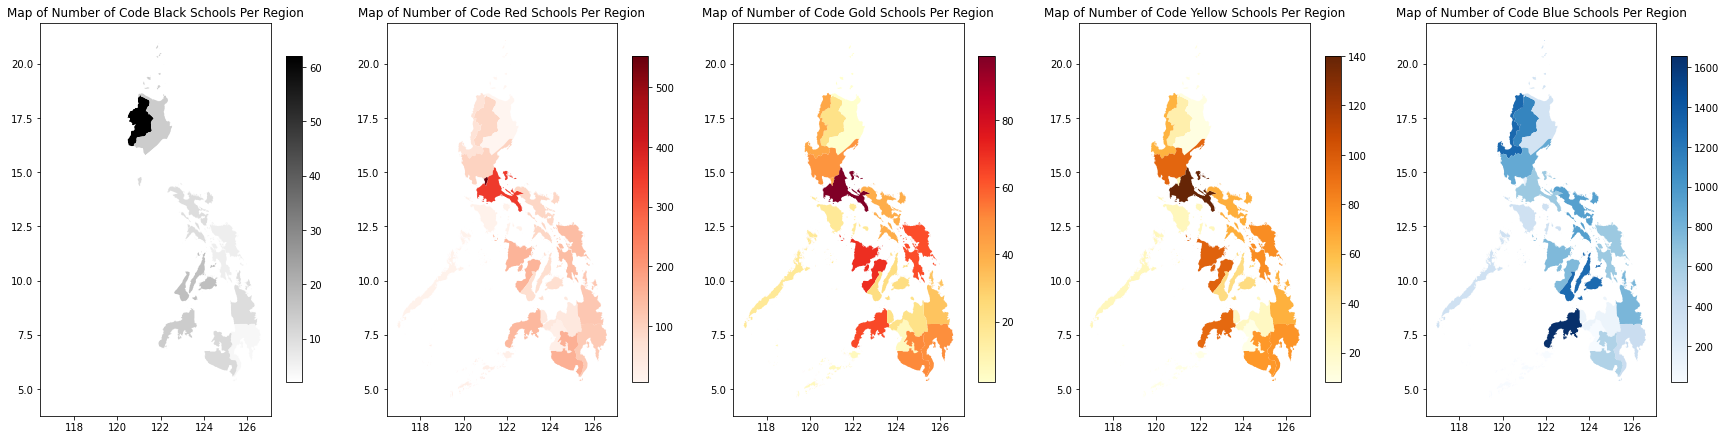

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5)

color_map = pd.merge(regional,color, left_on = 'Region,C,254', right_on = 'Region,C,254')

color_map[color_map['Color_Code,C,254'] == 'Black'].plot(column = 'OBJECTID,N,9,0_y',cmap = 'binary', ax = axes[0], legend = True, legend_kwds={'shrink': 0.2})
axes[0].set_title('Map of Number of Code Black Schools Per Region')

color_map[color_map['Color_Code,C,254'] == 'Red'].plot(column = 'OBJECTID,N,9,0_y',cmap = 'Reds', ax = axes[1], legend = True, legend_kwds={'shrink': 0.2})
axes[1].set_title('Map of Number of Code Red Schools Per Region')

color_map[color_map['Color_Code,C,254'] == 'Gold'].plot(column = 'OBJECTID,N,9,0_y',cmap = 'YlOrRd', ax = axes[2],  legend = True, legend_kwds={'shrink': 0.2})
axes[2].set_title('Map of Number of Code Gold Schools Per Region')

color_map[color_map['Color_Code,C,254'] == 'Yellow'].plot(column = 'OBJECTID,N,9,0_y',cmap = 'YlOrBr', ax = axes[3],  legend = True, legend_kwds={'shrink': 0.2})
axes[3].set_title('Map of Number of Code Yellow Schools Per Region')

color_map[color_map['Color_Code,C,254'] == 'Blue'].plot(column = 'OBJECTID,N,9,0_y',cmap = 'Blues', ax = axes[4],  legend = True, legend_kwds={'shrink': 0.2})
axes[4].set_title('Map of Number of Code Blue Schools Per Region') 

fig.set_figheight(30)
fig.set_figwidth(30)

**Geographical Visualization of Number of Schools per Color Code on Each Region**

Text(0.5, 1.0, 'Code Blue')

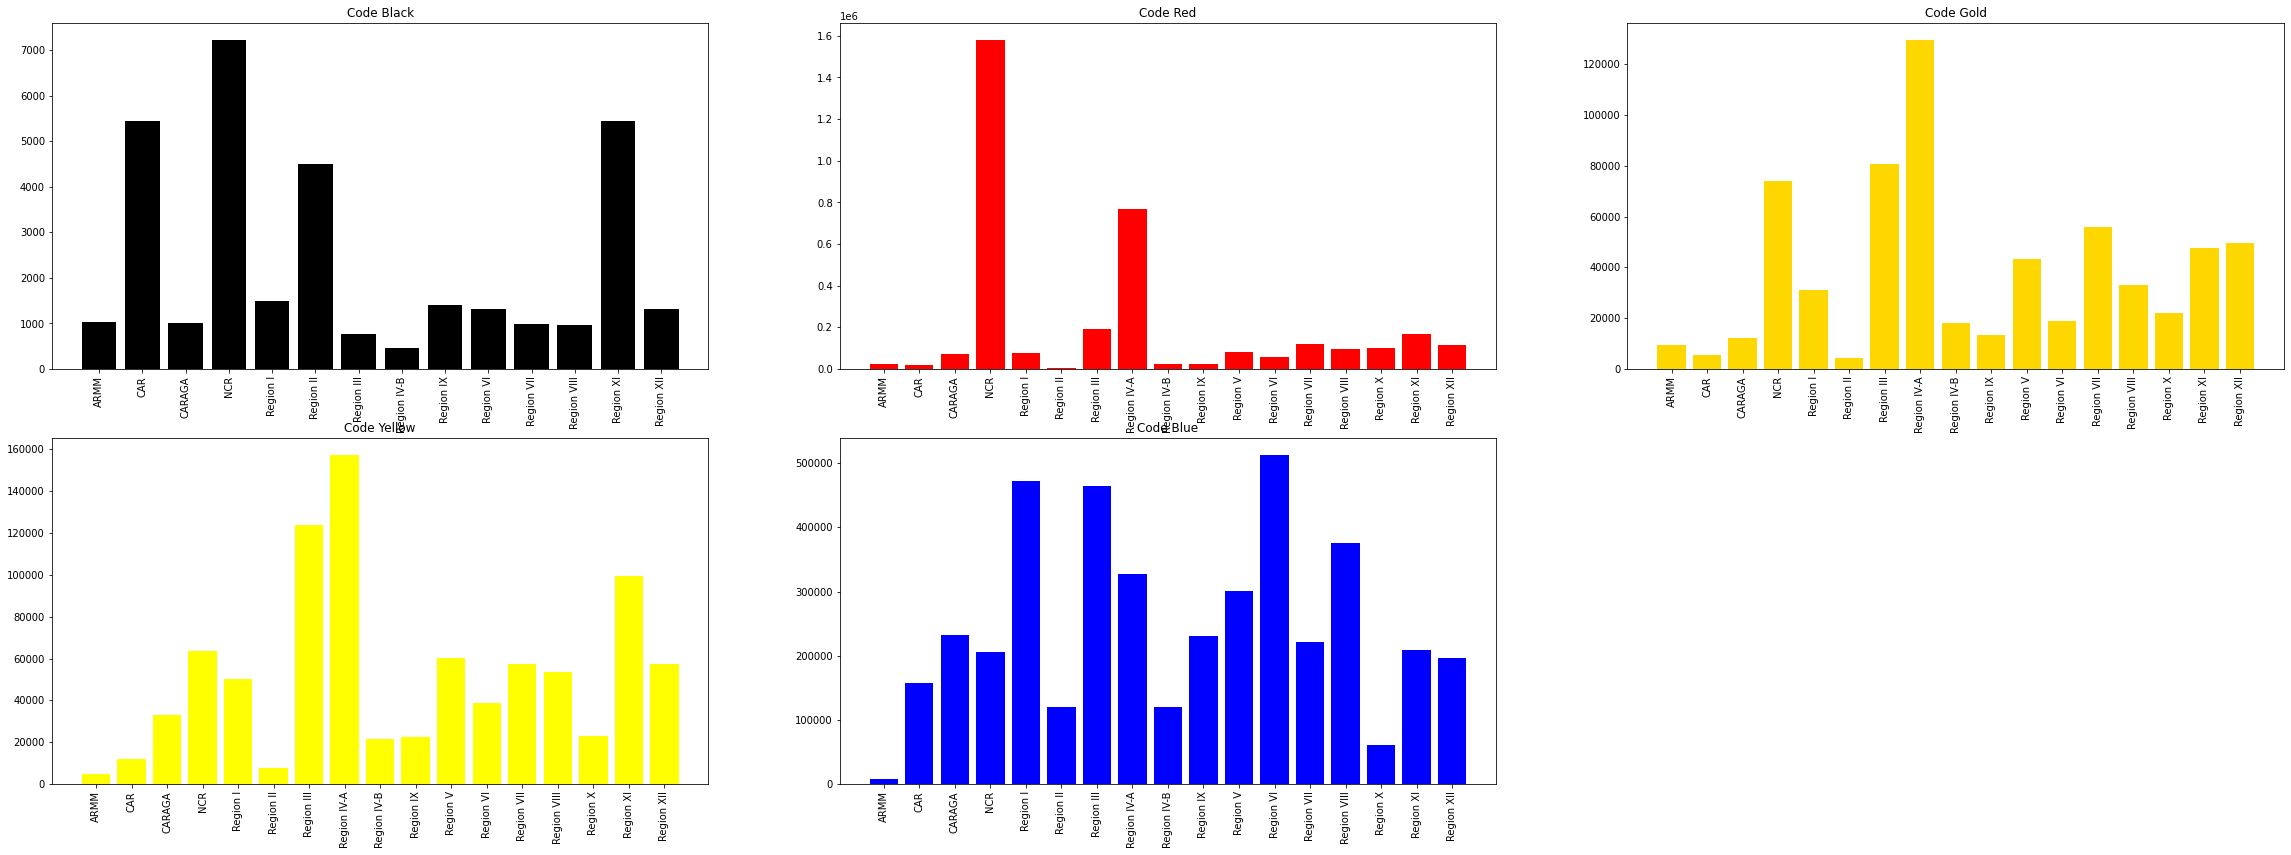

In [ ]:
color_student = schools.groupby(['Color_Code,C,254','Region,C,254'], as_index = False).sum().apply(lambda x: x.ffill().bfill())

plt.figure(figsize=(40,14))
ax1 = plt.subplot(2,3,1)
plt.bar(color_student[color_student['Color_Code,C,254'] == 'Black']['Region,C,254'],
        color_student[color_student['Color_Code,C,254'] == 'Black']['Total_Enro,N,19,11'],
        color = 'Black')
plt.xticks(rotation=90)
plt.title('Code Black')

ax1 = plt.subplot(2,3,2)
plt.bar(color_student[color_student['Color_Code,C,254'] == 'Red']['Region,C,254'],
        color_student[color_student['Color_Code,C,254'] == 'Red']['Total_Enro,N,19,11'],
        color = 'r')
plt.xticks(rotation=90)
plt.title('Code Red')

ax1 = plt.subplot(2,3,3)
plt.bar(color_student[color_student['Color_Code,C,254'] == 'Gold']['Region,C,254'],
        color_student[color_student['Color_Code,C,254'] == 'Gold']['Total_Enro,N,19,11'],
        color = 'Gold')
plt.xticks(rotation=90)
plt.title('Code Gold')

ax1 = plt.subplot(2,3,4)
plt.bar(color_student[color_student['Color_Code,C,254'] == 'Yellow']['Region,C,254'],
        color_student[color_student['Color_Code,C,254'] == 'Yellow']['Total_Enro,N,19,11'],
        color = 'Yellow')
plt.xticks(rotation=90)
plt.title('Code Yellow')

ax1 = plt.subplot(2,3,5)
plt.bar(color_student[color_student['Color_Code,C,254'] == 'Blue']['Region,C,254'],
        color_student[color_student['Color_Code,C,254'] == 'Blue']['Total_Enro,N,19,11'],
        color = 'b')
plt.xticks(rotation=90)
plt.title('Code Blue')

**Number of Students per Color Code of Each Region**

- This graph shows the number of students enrolled to each type of school based on color code.
- For students in code black schools, NCR has the highest number. The regions of CAR, Region II, and Region XI also have really high numbers relative to other regions.
- For code red schools, NCR is extremely high compared to all other regions. Region IV-A comes in second, with almost half the number of NCR.
- For code gold schools, Region IV-A has the highest number, and share similar numbers with Region III.
- For code blue schools, there are multiple regions with high numbers, such as region I, Region III, and Region VI.

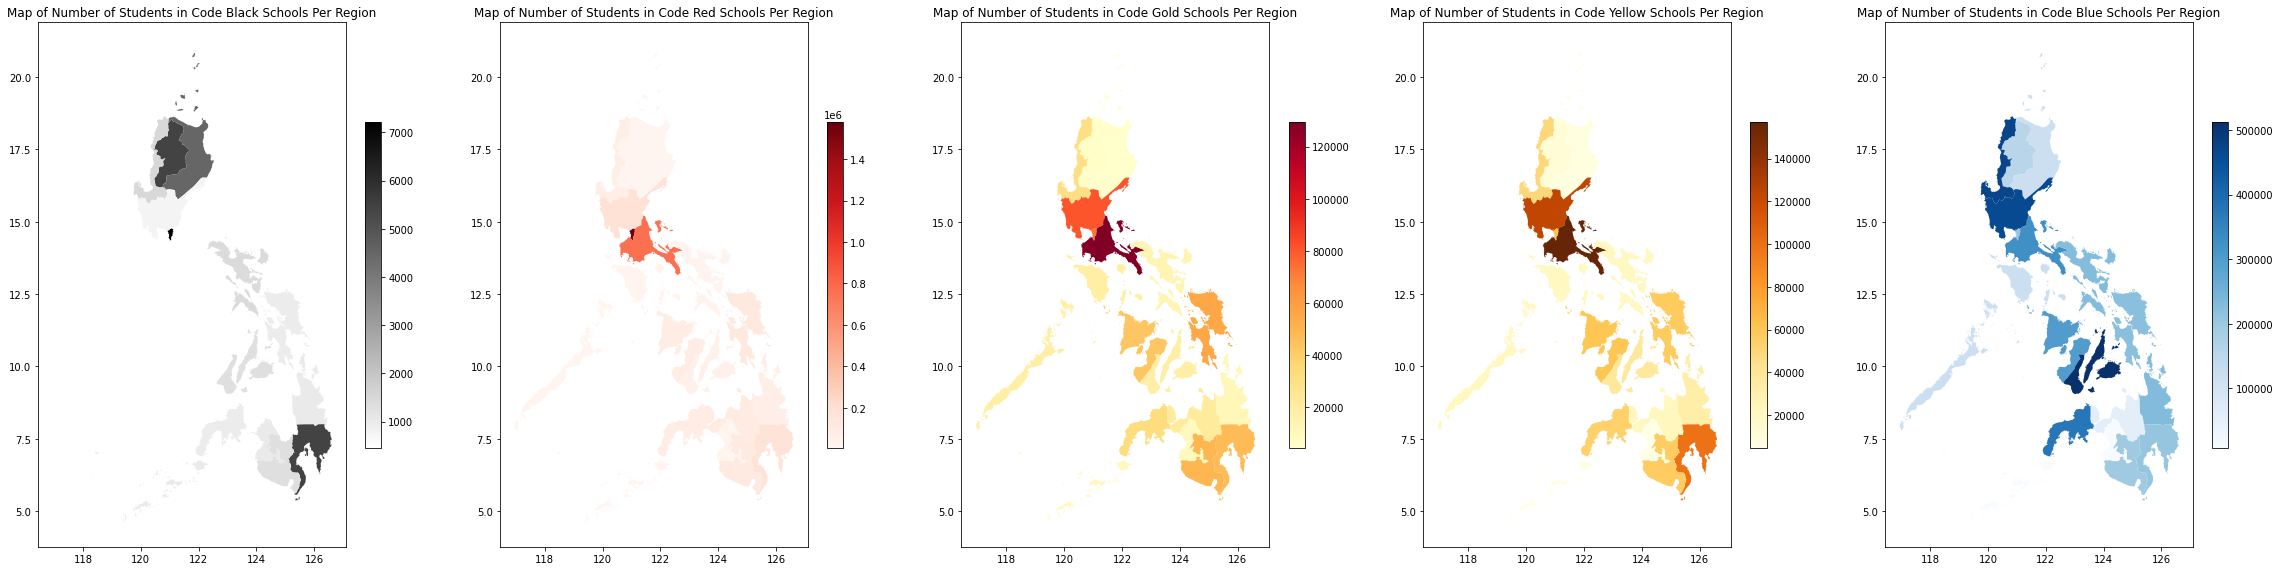

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=5)

color_map_students = pd.merge(regional,color_student, left_on = 'Region,C,254', right_on = 'Region,C,254')

color_map_students[color_map_students['Color_Code,C,254'] == 'Black'].plot(column = 'Total_Enro,N,19,11_y',cmap = 'binary', ax = ax[0], legend = True, legend_kwds={'shrink': 0.2})
ax[0].set_title('Map of Number of Students in Code Black Schools Per Region')

color_map_students[color_map_students['Color_Code,C,254'] == 'Red'].plot(column = 'Total_Enro,N,19,11_y',cmap = 'Reds', ax = ax[1], legend = True, legend_kwds={'shrink': 0.2})
ax[1].set_title('Map of Number of Students in Code Red Schools Per Region')

color_map_students[color_map_students['Color_Code,C,254'] == 'Gold'].plot(column = 'Total_Enro,N,19,11_y',cmap = 'YlOrRd', ax = ax[2],  legend = True, legend_kwds={'shrink': 0.2})
ax[2].set_title('Map of Number of Students in Code Gold Schools Per Region')

color_map_students[color_map_students['Color_Code,C,254'] == 'Yellow'].plot(column = 'Total_Enro,N,19,11_y',cmap = 'YlOrBr', ax = ax[3],  legend = True, legend_kwds={'shrink': 0.2})
ax[3].set_title('Map of Number of Students in Code Yellow Schools Per Region')

color_map_students[color_map_students['Color_Code,C,254'] == 'Blue'].plot(column = 'Total_Enro,N,19,11_y',cmap = 'Blues', ax = ax[4],  legend = True, legend_kwds={'shrink': 0.2})
ax[4].set_title('Map of Number of Students in Code Blue Schools Per Region') 

fig.set_figheight(30)
fig.set_figwidth(40)

**Geographical Visualization of Number of Schools per Color Code on Each Region**

Text(0.5, 1.0, 'Region XII')

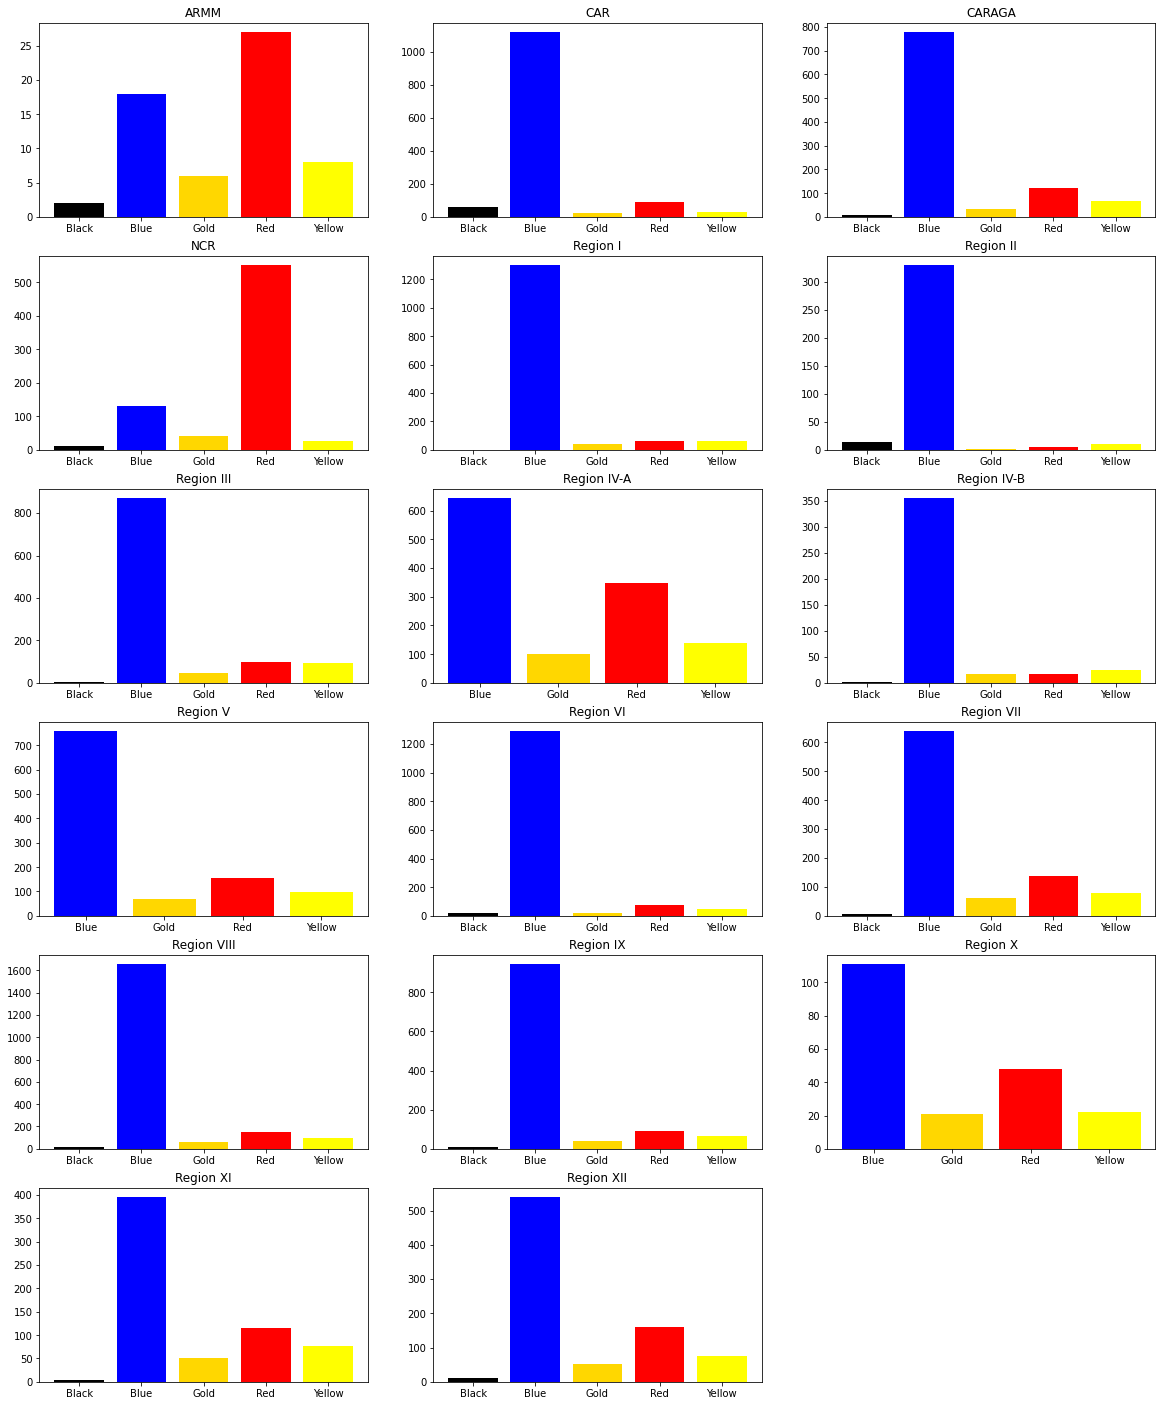

In [ ]:
plt.figure(figsize=(20,25)) 

ax = plt.subplot(6,3,1)
plt.bar(color[color['Region,C,254'] == 'ARMM']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'ARMM']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('ARMM')

ax = plt.subplot(6,3,2)
plt.bar(color[color['Region,C,254'] == 'CAR']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'CAR']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('CAR')

ax = plt.subplot(6,3,3)
plt.bar(color[color['Region,C,254'] == 'CARAGA']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'CARAGA']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('CARAGA')

ax = plt.subplot(6,3,4)
plt.bar(color[color['Region,C,254'] == 'NCR']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'NCR']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('NCR')

ax = plt.subplot(6,3,5)
plt.bar(color[color['Region,C,254'] == 'Region I']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region I']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region I')

ax = plt.subplot(6,3,6)
plt.bar(color[color['Region,C,254'] == 'Region II']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region II']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region II')

ax = plt.subplot(6,3,7)
plt.bar(color[color['Region,C,254'] == 'Region III']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region III']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region III')

ax = plt.subplot(6,3,8)
plt.bar(color[color['Region,C,254'] == 'Region IV-A']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region IV-A']['OBJECTID,N,9,0'],
        color = ['b', 'Gold', 'r', 'Yellow'])
plt.title('Region IV-A')

ax = plt.subplot(6,3,9)
plt.bar(color[color['Region,C,254'] == 'Region IV-B']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region IV-B']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region IV-B')

ax = plt.subplot(6,3,10)
plt.bar(color[color['Region,C,254'] == 'Region V']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region V']['OBJECTID,N,9,0'],
        color = ['b', 'Gold', 'r', 'Yellow'])
plt.title('Region V')

ax = plt.subplot(6,3,11)
plt.bar(color[color['Region,C,254'] == 'Region VI']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region VI']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region VI')

ax = plt.subplot(6,3,12)
plt.bar(color[color['Region,C,254'] == 'Region VII']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region VII']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region VII')

ax = plt.subplot(6,3,13)
plt.bar(color[color['Region,C,254'] == 'Region VIII']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region VIII']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region VIII')

ax = plt.subplot(6,3,14)
plt.bar(color[color['Region,C,254'] == 'Region IX']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region IX']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region IX')

ax = plt.subplot(6,3,15)
plt.bar(color[color['Region,C,254'] == 'Region X']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region X']['OBJECTID,N,9,0'],
        color = ['b', 'Gold', 'r', 'Yellow'])
plt.title('Region X')

ax = plt.subplot(6,3,16)
plt.bar(color[color['Region,C,254'] == 'Region XI']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region XI']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region XI')

ax = plt.subplot(6,3,17)
plt.bar(color[color['Region,C,254'] == 'Region XII']['Color_Code,C,254'],
        color[color['Region,C,254'] == 'Region XII']['OBJECTID,N,9,0'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region XII')

**Distribution of Schools per Color Code for Each Region** 

The graphs show how many schools are there for each color code in every region.

- For the regions of CAR, CARAGA, Region I, Region II, Region III, Region IV-B, Region VI, Region VII, Region VIII, Region IX, Region IX, and Region XII, majority of their schools are code blue schools. This is indicates that several regions have majority of their schools not lacking teachers.
- Majority of schools within ARMM and NCR are code red schools meaning majority of their education system is in need of additional teachers.
- Majority of the schools within Region IV-A, Region V, and Region X are code black. Majority of their schools do not have teachers that are supported by the national government.

**Do note that this is not the best representation of color codes of schools because it still depends on the number of students enrolled in those schools**

Text(0.5, 1.0, 'Region XII')

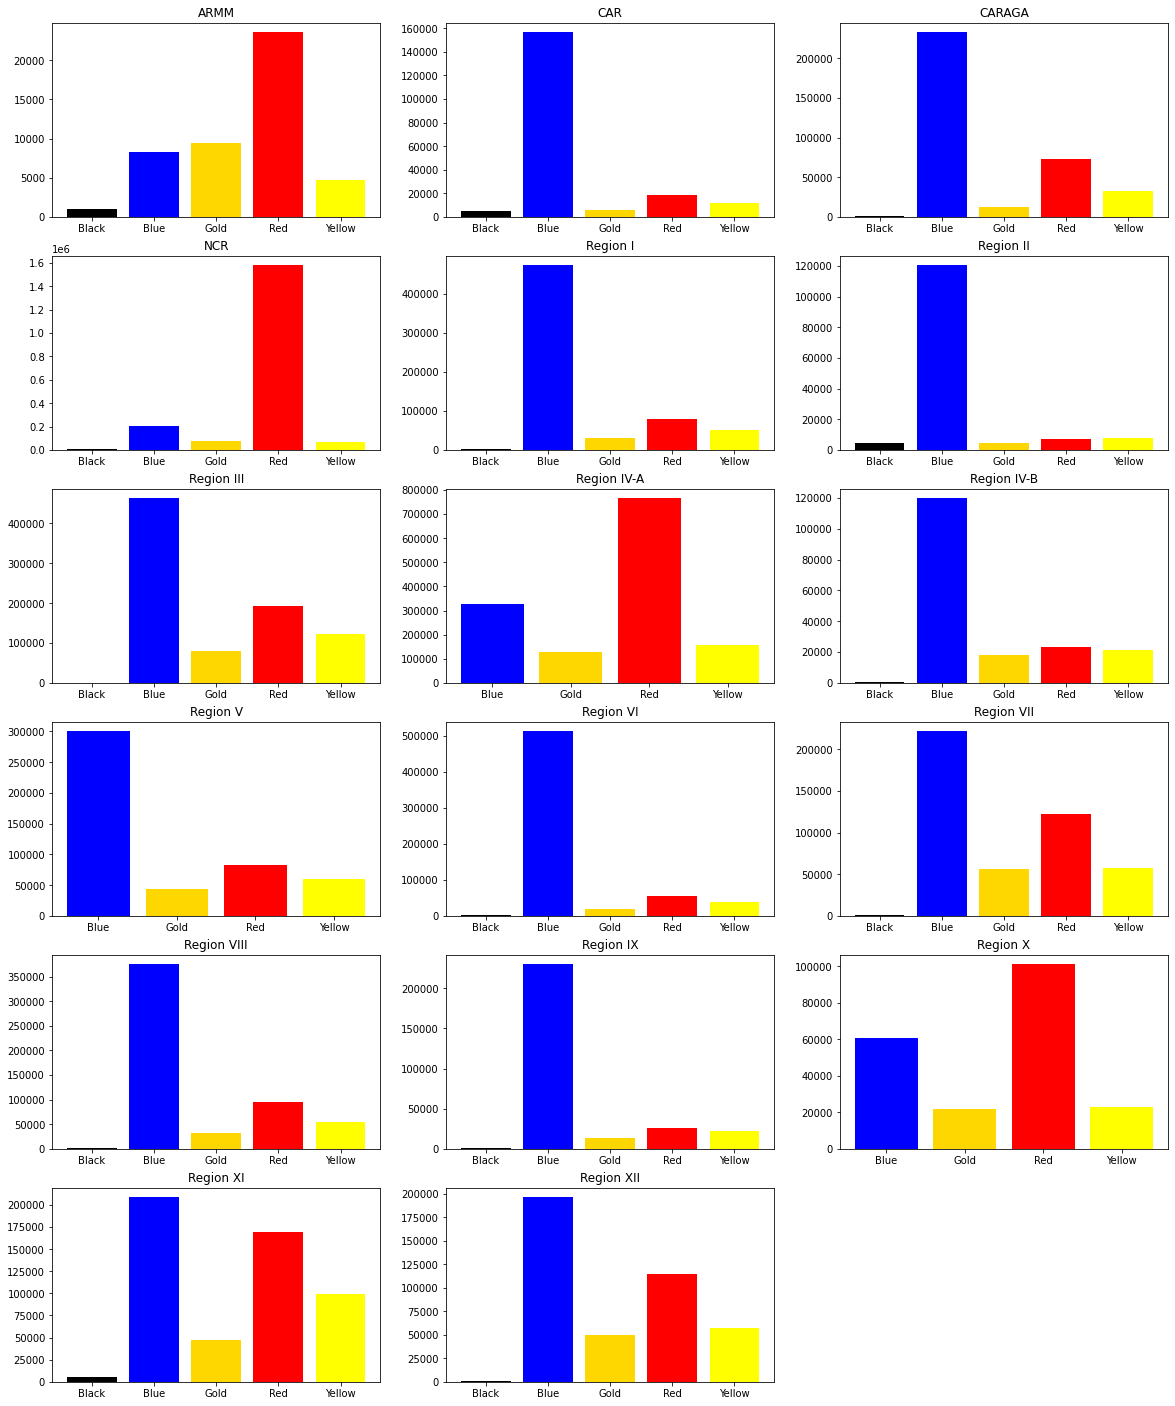

In [ ]:
plt.figure(figsize=(20,25)) 

ax = plt.subplot(6,3,1)
plt.bar(color_student[color_student['Region,C,254'] == 'ARMM']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'ARMM']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('ARMM')

ax = plt.subplot(6,3,2)
plt.bar(color_student[color_student['Region,C,254'] == 'CAR']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'CAR']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('CAR')

ax = plt.subplot(6,3,3)
plt.bar(color_student[color_student['Region,C,254'] == 'CARAGA']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'CARAGA']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('CARAGA')

ax = plt.subplot(6,3,4)
plt.bar(color_student[color_student['Region,C,254'] == 'NCR']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'NCR']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('NCR')

ax = plt.subplot(6,3,5)
plt.bar(color_student[color_student['Region,C,254'] == 'Region I']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region I']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region I')

ax = plt.subplot(6,3,6)
plt.bar(color_student[color_student['Region,C,254'] == 'Region II']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region II']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region II')

ax = plt.subplot(6,3,7)
plt.bar(color_student[color_student['Region,C,254'] == 'Region III']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region III']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region III')

ax = plt.subplot(6,3,8)
plt.bar(color_student[color_student['Region,C,254'] == 'Region IV-A']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region IV-A']['Total_Enro,N,19,11'],
        color = ['b', 'Gold', 'r', 'Yellow'])
plt.title('Region IV-A')

ax = plt.subplot(6,3,9)
plt.bar(color_student[color_student['Region,C,254'] == 'Region IV-B']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region IV-B']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region IV-B')

ax = plt.subplot(6,3,10)
plt.bar(color_student[color_student['Region,C,254'] == 'Region V']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region V']['Total_Enro,N,19,11'],
        color = ['Blue', 'Gold', 'r', 'Yellow'])
plt.title('Region V')

ax = plt.subplot(6,3,11)
plt.bar(color_student[color_student['Region,C,254'] == 'Region VI']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region VI']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region VI')

ax = plt.subplot(6,3,12)
plt.bar(color_student[color_student['Region,C,254'] == 'Region VII']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region VII']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region VII')

ax = plt.subplot(6,3,13)
plt.bar(color_student[color_student['Region,C,254'] == 'Region VIII']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region VIII']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region VIII')

ax = plt.subplot(6,3,14)
plt.bar(color_student[color_student['Region,C,254'] == 'Region IX']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region IX']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region IX')

ax = plt.subplot(6,3,15)
plt.bar(color_student[color_student['Region,C,254'] == 'Region X']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region X']['Total_Enro,N,19,11'],
        color = ['b', 'Gold', 'r', 'Yellow'])
plt.title('Region X')

ax = plt.subplot(6,3,16)
plt.bar(color_student[color_student['Region,C,254'] == 'Region XI']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region XI']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region XI')

ax = plt.subplot(6,3,17)
plt.bar(color_student[color_student['Region,C,254'] == 'Region XII']['Color_Code,C,254'],
        color_student[color_student['Region,C,254'] == 'Region XII']['Total_Enro,N,19,11'],
        color = ['Black', 'b', 'Gold', 'r', 'Yellow'])
plt.title('Region XII')

**Distribution of Schools per Color Code for Each Region** 

